In [85]:
#ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#データセットの読み込み
train = pd.read_csv(r"D:\titanic\train.csv",index_col=0)
test = pd.read_csv(r"D:\titanic\test.csv",index_col=0)

In [86]:
#各列の要素を確認
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [87]:
#各列の要素を確認
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

In [88]:
#データの配列の大きさを確認
train.shape

(891, 11)

In [89]:
#データの配列の大きさを確認
test.shape

(418, 10)

In [90]:
'''欠損要素をTrue、それ以外をFalseに変換するには、.isnull()関数を使用'''

train.isnull()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


In [91]:
#各列の欠損値の数をカウントするにはisnull().sum()関数。
#各列のsumがでる。True→1だからtrueの数だけ出力
train.isnull().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [92]:
#各列の欠損値ではない要素数をカウントするにはnotnull().sum()関数。
#「Age」、「Cabin」、「Embarked」に欠損値がある
#notnullの場合はFalseがtrueになって、欠損値じゃない要素の数を出力
train.notnull().sum()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

In [93]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [94]:
'''.drop()関数では、引数labelsとaxisで指定。行の場合はaxis=0、列の場合はaxis=1。'''
drop_columns = ["Age","Cabin","Fare","Embarked"]
train_modify = train.drop(drop_columns,axis=1)
test_modify = test.drop(drop_columns,axis=1)

In [95]:
train_modify.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Ticket      0
dtype: int64

In [96]:
test_modify.isnull().sum()

Pclass    0
Name      0
Sex       0
SibSp     0
Parch     0
Ticket    0
dtype: int64

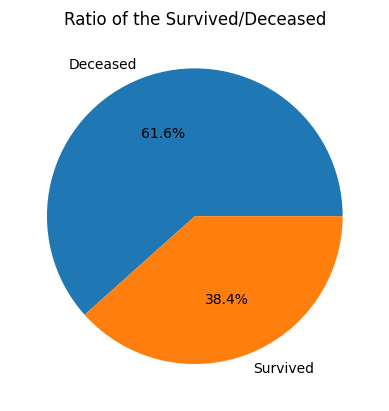

In [97]:
plt.pie(train["Survived"].value_counts(),labels=["Deceased","Survived"],autopct="%.1f%%")
plt.title("Ratio of the Survived/Deceased")
plt.show()

In [98]:
train.groupby(["Sex"]).sum()["Survived"]

Sex
female    233
male      109
Name: Survived, dtype: int64

<Axes: xlabel='Sex'>

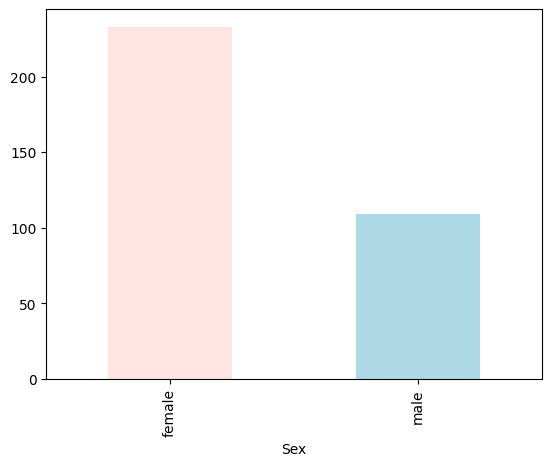

In [99]:
train.groupby(["Sex"]).sum()["Survived"].plot.bar(color=['mistyrose', 'lightblue'])

In [100]:
train.groupby(["Sex","Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex,Survived'>

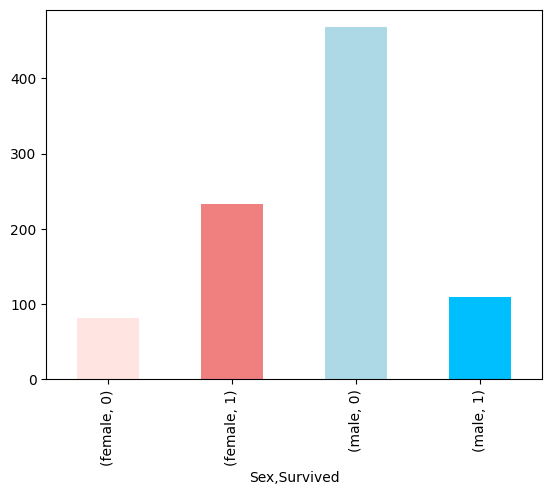

In [101]:
train.groupby(["Sex","Survived"])["Survived"].count().plot.bar(color=["mistyrose","lightcoral","lightblue","deepskyblue"])

In [102]:
train.groupby(["Sex"]).mean()["Survived"]
#エラー

TypeError: agg function failed [how->mean,dtype->object]

In [106]:
train.groupby(["Sex"]).mean()

C:\temp\ipykernel_8924\1012985294.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train.groupby(["Sex"]).mean()


TypeError: agg function failed [how->mean,dtype->object]

In [110]:
print(train)

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
...               ...     ...   
887                 0       2   
888                 1       1   
889                 0       3   
890                 1       1   
891                 0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
...       

In [113]:
#.locで指定した名前の行と列を抽出することができる。
#"→ただの文字列は囲む。変数は囲わない。
train.loc[:,["Age","Fare","Survived","Sex"]]

,Age,Fare,Survived,Sex
PassengerId,,,,
1,22.0,7.2500,0,male
2,38.0,71.2833,1,female
3,26.0,7.9250,1,female
4,35.0,53.1000,1,female
5,35.0,8.0500,0,male
...,...,...,...,...
887,27.0,13.0000,0,male
888,19.0,30.0000,1,female
889,NaN,23.4500,0,female


In [ ]:
df=train.loc[:,["Age","Fare","Survived","Sex"]]

In [ ]:
train.groupby(["Sex"])["Survived"].mean()

In [103]:
# 'Survived'列のユニークな値を表示
print(train['Survived'].unique())

# 'Survived'列に欠損値があるか確認
print(train['Survived'].isnull().sum())

# 'Sex'列のユニークな値を表示
print(train['Sex'].unique())


[0 1]
0
['male' 'female']


In [104]:
# 'Sex'列をカテゴリ型に変換
train['Sex'] = train['Sex'].astype('category')

# 'Sex'でグループ化し、'Survived'の平均を計算
survived_by_sex = train.groupby('Sex')['Survived'].mean()
print(survived_by_sex)


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


C:\temp\ipykernel_8924\3403208958.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_by_sex = train.groupby('Sex')['Survived'].mean()
